# Business Problem

To predict the number of furniture items sold (sold) based on product attributes such as productTitle, originalPrice, price, and tagText.

* Understand sales trends and factors influencing sales.
* Optimize pricing strategies.
* Identify important product features affecting sales

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

# Bascis Checks

In [4]:
# Display the first few rows
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [5]:
# Diplay last few rows
df.tail()

,productTitle,originalPrice,price,sold,tagText
1995,Modern TV Stand Entertainment Center with Two ...,NaN,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",NaN,$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",NaN,$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,NaN,$228.18,0,Free shipping
1999,Bed Frane Bamboo and Metal Platform Bed Frame ...,NaN,$99.48,0,Free shipping


In [6]:
# Check column datatypes and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.2+ KB


In [7]:
# Checking shape
df.shape

(2000, 5)

In [8]:
# Checking for missing values
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [9]:
# Summary statistics for numerical columns
df.describe()

,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


### Convert originalPrice & price to Numeric

In [5]:
# Remove non-numeric characters (e.g., $, , or any text) before converting
df['originalPrice'] = df['originalPrice'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['price'] = df['price'].astype(str).str.replace(r'[^\d.]', '', regex=True)

# Now convert to numeric
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

### Handle Missing Values

In [6]:
# Fill missing originalPrice with price (assuming no discount)
df['originalPrice'].fillna(df['price'], inplace=True)

# Fill missing tagText with "No Tag"
df['tagText'].fillna("No Tag", inplace=True)

### Clean productTitle (Text Preprocessing)

In [7]:
import re

# Remove special characters & convert to lowercase
df['productTitle'] = df['productTitle'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', str(x).lower()))

### Encode tagText (Categorical Encoding)

In [8]:
# Convert tagText into numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['tagText'] = encoder.fit_transform(df['tagText'])

### Final Check

In [9]:
print(df.info())  # Ensure all columns are clean
print(df.head())  # View cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   2000 non-null   object 
 1   originalPrice  2000 non-null   float64
 2   price          2000 non-null   float64
 3   sold           2000 non-null   int64  
 4   tagText        2000 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 70.4+ KB
None
                                        productTitle  originalPrice   price  \
0  dresser for bedroom with 9 fabric drawers ward...          46.79   46.79   
1  outdoor conversation set 4 pieces patio furnit...         169.72  169.72   
2  desser for bedroom with 7 fabric drawers organ...          78.40   39.46   
3  modern accent boucle chairupholstered tufted c...         111.99  111.99   
4  small unit simple computer desk household wood...          48.82   21.37   

   sold  tagText  
0   600       

# Exploratrory Data Analysis

## Univariate Analysis

### Distribution of originalPrice, price, and sold

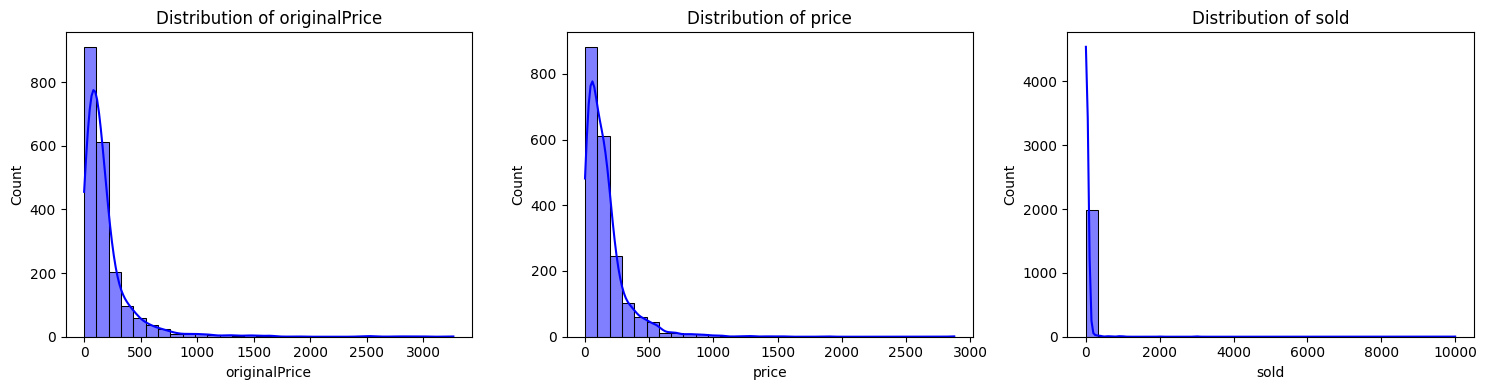

In [15]:
# Define numerical columns
num_cols = ['originalPrice', 'price', 'sold']

# Plot histograms
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

* originalPrice and price are right-skewed, meaning most products are cheaper, but a few high-priced items exist.
* sold is also right-skewed, indicating that some items sell in large quantities while many do not sell much.

### Boxplot to detect Outliers

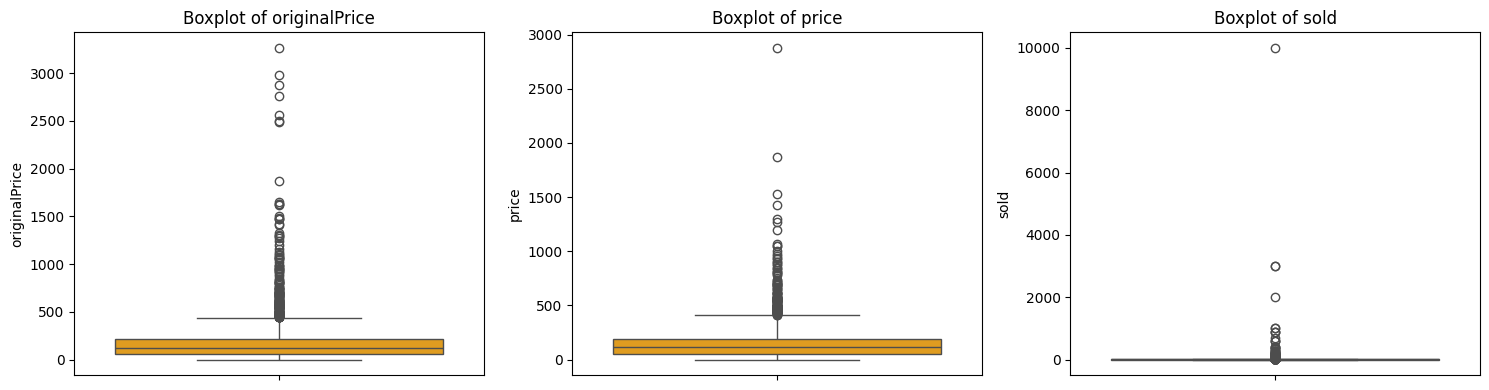

In [17]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

* The price and originalPrice columns contain outliers—likely due to luxury furniture.
* The sold column has some extreme values, indicating a few products are very popular.

### Distribution of TagText

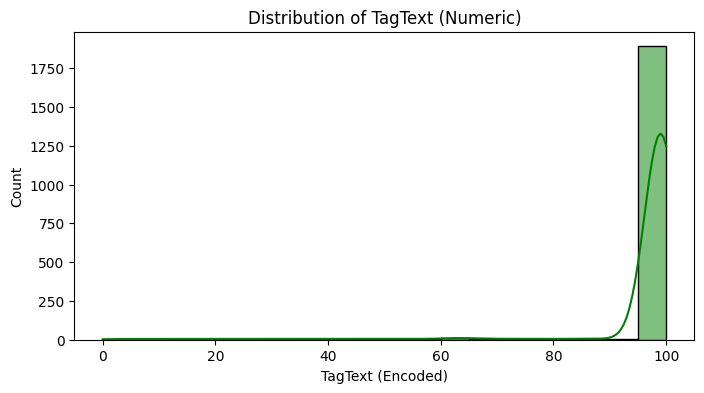

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df['tagText'], bins=20, kde=True, color='green')
plt.title("Distribution of TagText (Numeric)")
plt.xlabel("TagText (Encoded)")
plt.show()

* The encoded tagText feature follows a certain distribution, meaning different product tags have varying frequencies.

## Bivariate Analysis

### Correlation Between Numerical Features

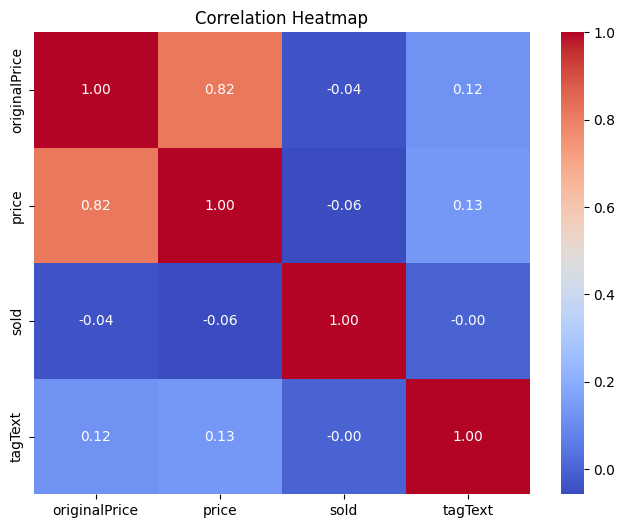

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['originalPrice', 'price', 'sold', 'tagText']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

* originalPrice and price are highly correlated (as expected).
* sold has a weak correlation with price and originalPrice, suggesting that price alone doesn’t determine sales volume.
* tagText (numeric) has a low correlation with other features.

### Relationship Between Price, Sales, and tagText

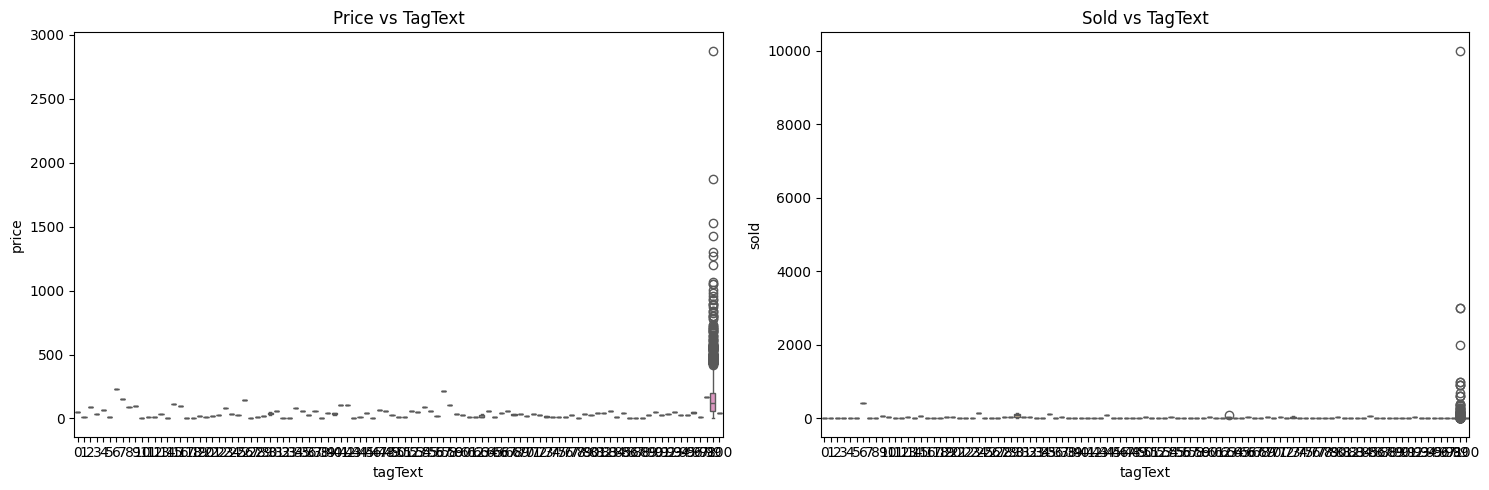

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='tagText', y='price', data=df, ax=axes[0], palette="Set2")
axes[0].set_title('Price vs TagText')

sns.boxplot(x='tagText', y='sold', data=df, ax=axes[1], palette="Set2")
axes[1].set_title('Sold vs TagText')

plt.tight_layout()
plt.show()

* Some product tags (e.g., "Free Shipping") might be linked to lower or higher prices.
* Certain tags may be influencing higher sales volumes.

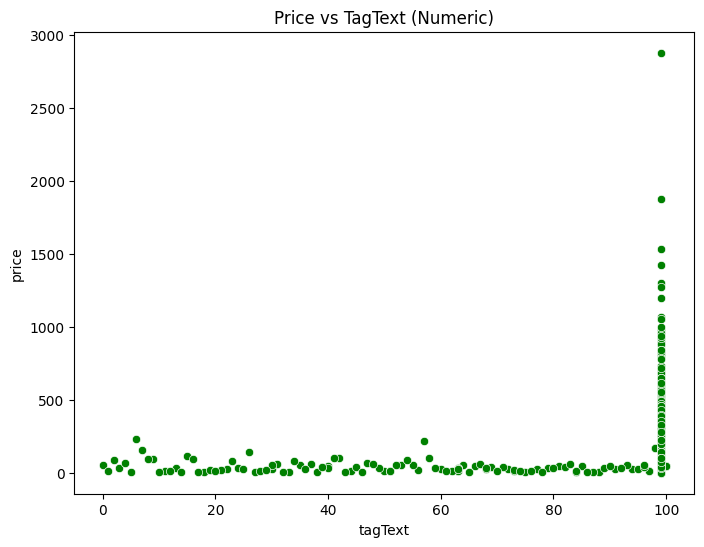

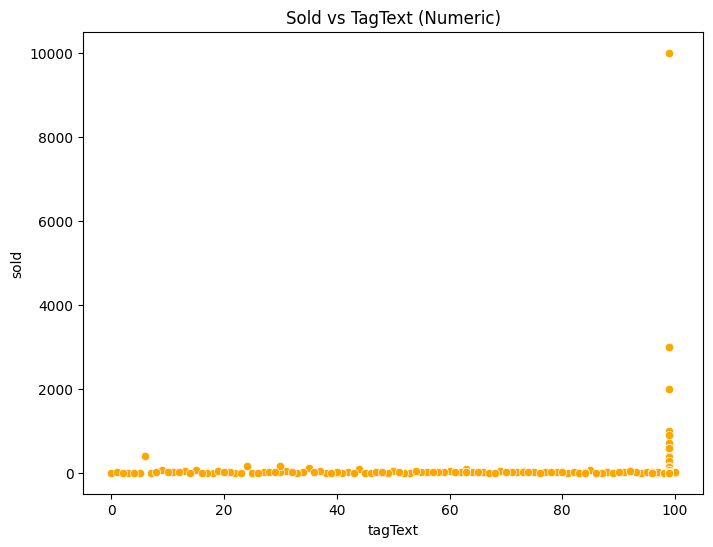

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tagText', y='price', data=df, color='green')
plt.title("Price vs TagText (Numeric)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tagText', y='sold', data=df, color='orange')
plt.title("Sold vs TagText (Numeric)")
plt.show()

* There is no clear trend between tagText and price/sold, meaning product tags alone may not directly influence price or sales volume.

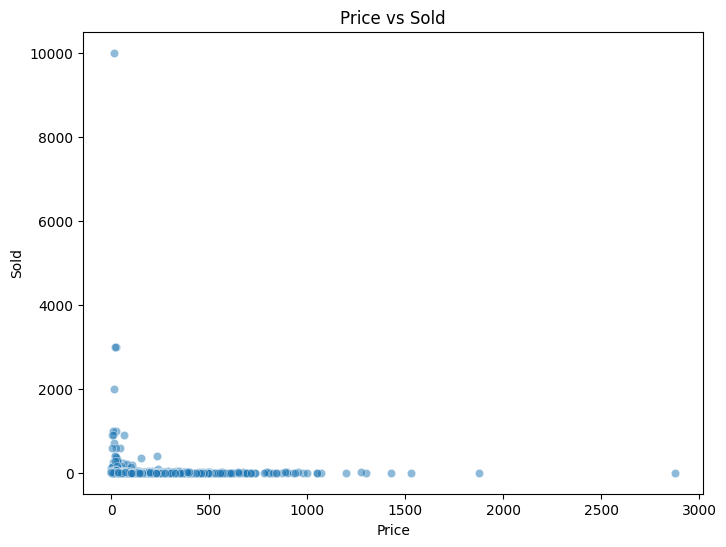

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='sold', data=df, alpha=0.5)
plt.title("Price vs Sold")
plt.xlabel("Price")
plt.ylabel("Sold")
plt.show()

* There is no strong linear relationship between price and the number of items sold.
* Some expensive items still sell well, meaning other factors (e.g., product features) play a role in sales.

## Multivariate Analysis

### Pairplot for Key features

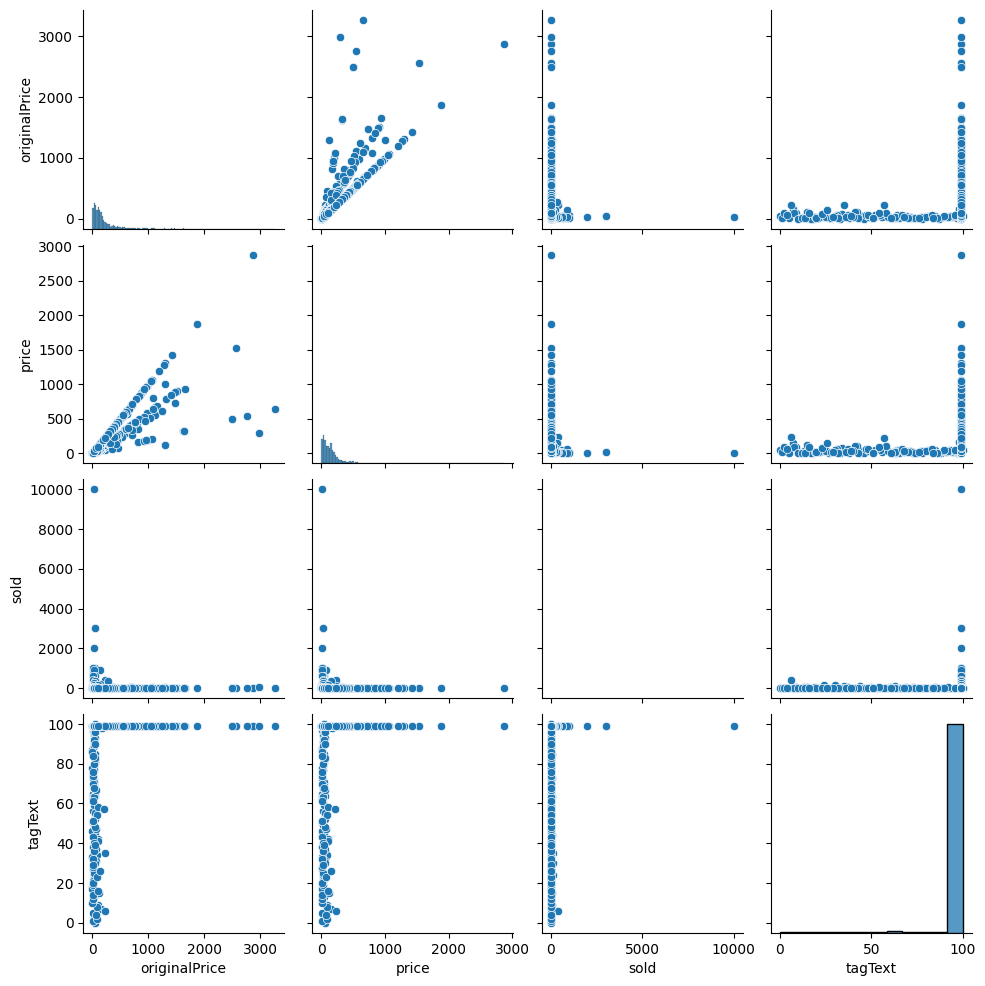

In [24]:
sns.pairplot(df[['originalPrice', 'price', 'sold', 'tagText']])
plt.show()

* originalPrice and price have a strong positive relationship.
* No strong multivariate relationships between sold, price, and tagText.

### Checking Interaction Effects

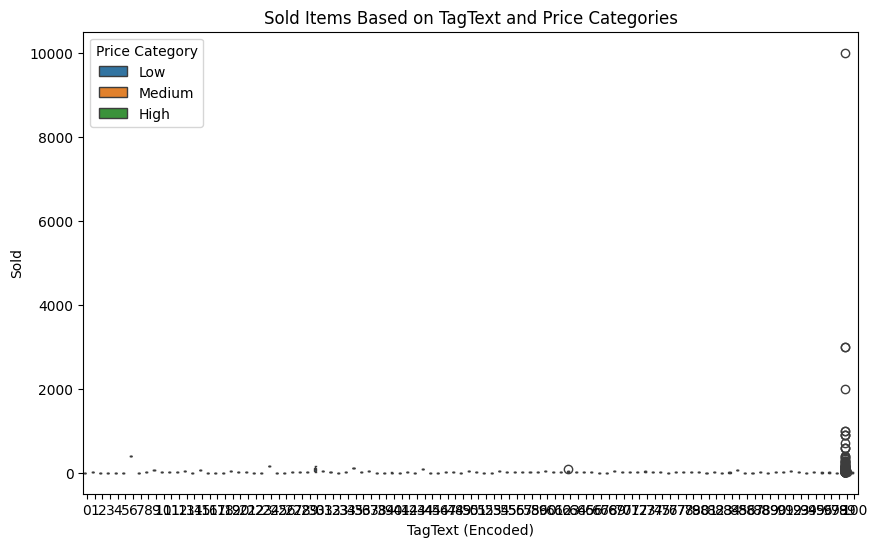

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tagText', y='sold', hue=pd.cut(df['price'], bins=3, labels=['Low', 'Medium', 'High']), data=df)
plt.title("Sold Items Based on TagText and Price Categories")
plt.xlabel("TagText (Encoded)")
plt.ylabel("Sold")
plt.legend(title="Price Category")
plt.show()

* The interaction between price categories and tagText affects sales volume.
* Some tags seem more effective at higher or lower price ranges.

## FINAL EDA INSIGHTS

* ✅ price and originalPrice are highly correlated (expected).
* ✅ sold doesn’t have a strong correlation with price, meaning other factors influence furniture sales.
* ✅ Outliers exist in price and sold; they may need handling before modeling.
* ✅ tagText (numeric) has no strong direct impact on sales but interacts with price.
* ✅ Multivariate analysis shows tagText influences sales differently across price ranges.

# Data preprocessing

## Handling Missing Values

In [11]:
# Checking missing values
df.isnull().sum()

productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64

## Handling Outliers

In [12]:
from scipy import stats

# Checking Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df[['originalPrice', 'price', 'sold']]))
outliers = (z_scores > 3).sum(axis=0)
print("Outlier Count per Column:\n", outliers)

Outlier Count per Column:
 originalPrice    38
price            35
sold              9
dtype: int64


In [13]:
# Capping outliers at 99th percentile
for col in ['originalPrice', 'price', 'sold']:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df[col] = np.clip(df[col], lower_limit, upper_limit)

## Scaling Numetical Features

In [14]:
from sklearn.preprocessing import StandardScaler

# Initializing scaler
scaler = StandardScaler()

# Scaling numerical columns
df[['originalPrice', 'price', 'sold']] = scaler.fit_transform(df[['originalPrice', 'price', 'sold']])

# Feature Engineering

#### Feature Extraction from productTitle

In [15]:
def extract_furniture_category(title):
    title = title.lower()
    if "sofa" in title:
        return "Sofa"
    elif "chair" in title:
        return "Chair"
    elif "table" in title:
        return "Table"
    elif "bed" in title:
        return "Bed"
    elif "shelf" in title:
        return "Shelf"
    else:
        return "Other"

# Creating a new feature 'furniture_category'
df['furniture_category'] = df['productTitle'].apply(extract_furniture_category)

In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to 'furniture_category'
df['furniture_category'] = label_encoder.fit_transform(df['furniture_category'])

# Checking assigned labels
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Bed': 0, 'Chair': 1, 'Other': 2, 'Shelf': 3, 'Sofa': 4, 'Table': 5}


In [17]:
df.drop(columns=['productTitle'], inplace=True)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Display correlation values
print(corr_matrix)

                    originalPrice     price      sold   tagText  \
originalPrice            1.000000  0.889704 -0.130600  0.136465   
price                    0.889704  1.000000 -0.192637  0.151407   
sold                    -0.130600 -0.192637  1.000000 -0.072473   
tagText                  0.136465  0.151407 -0.072473  1.000000   
furniture_category       0.073141  0.085928 -0.018664  0.019170   

                    furniture_category  
originalPrice                 0.073141  
price                         0.085928  
sold                         -0.018664  
tagText                       0.019170  
furniture_category            1.000000  


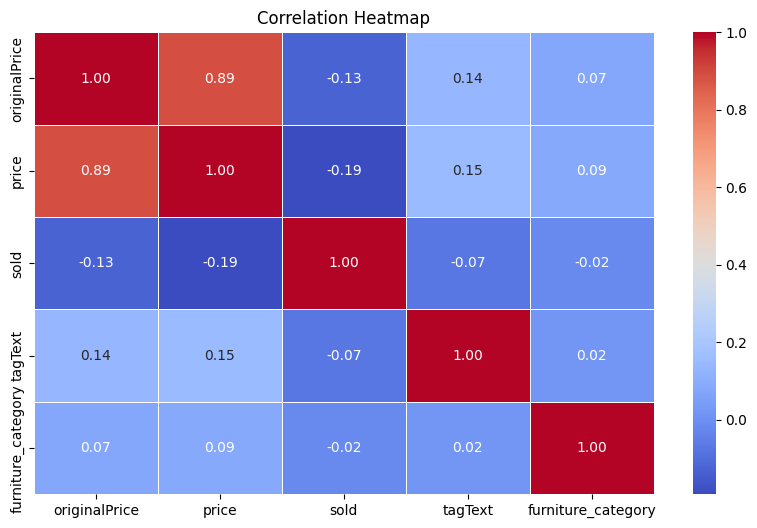

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [20]:
df.drop(columns=['originalPrice', 'tagText'], inplace=True)
print(df.head())  # Checking the updated dataset

      price      sold  furniture_category
0 -0.699578  7.570163                   0
1  0.109657 -0.351503                   4
2 -0.747831 -0.153518                   0
3 -0.270374 -0.351503                   4
4 -0.866915 -0.323219                   5


# Model Creation

In [24]:
from sklearn.model_selection import train_test_split

In [22]:
# Define independent variables (features) and target variable
X = df[['price', 'furniture_category']]
y = df['sold']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
X_train[['price']] = scaler.fit_transform(X_train[['price']])
X_test[['price']] = scaler.transform(X_test[['price']])

# Machine Learning Models

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Model Evaluation
print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Linear Regression Results:
MAE: 0.4805263683693309
MSE: 1.3240711595538193
RMSE: 1.1506829100815825
R² Score: 0.03651186559829789


In [29]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred = knn_model.predict(X_test)

# Model Evaluation
print("KNN Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

KNN Regression Results:
MAE: 0.4745906003216237
MSE: 1.2931681372950168
RMSE: 1.1371755085715736
R² Score: 0.058999097533431355


In [30]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Model Evaluation
print("Decision Tree Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Decision Tree Regression Results:
MAE: 0.48862529123149956
MSE: 1.7542342157615591
RMSE: 1.3244750717780833
R² Score: -0.27650529932038515


In [31]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predictions
y_pred = svr_model.predict(X_test)

# Model Evaluation
print("Support Vector Regression (SVM) Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Support Vector Regression (SVM) Results:
MAE: 0.37926021784801117
MSE: 1.3800567397018852
RMSE: 1.1747581622197334
R² Score: -0.0042272153650197986


In [32]:
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)
bagging_model.fit(X_train, y_train)

# Predictions
y_pred = bagging_model.predict(X_test)

# Model Evaluation
print("Bagging Regressor Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Bagging Regressor Results:
MAE: 0.4683386287497243
MSE: 1.3804194378333512
RMSE: 1.174912523481366
R² Score: -0.004491140263251703


In [33]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Model Evaluation
print("Gradient Boosting Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

Gradient Boosting Regression Results:
MAE: 0.4208662147001381
MSE: 1.190601204825493
RMSE: 1.0911467384479014
R² Score: 0.13363407595080545


In [34]:
ada_model = AdaBoostRegressor()
ada_model.fit(X_train, y_train)

# Predictions
y_pred = ada_model.predict(X_test)

# Model Evaluation
print("AdaBoost Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

AdaBoost Regression Results:
MAE: 1.0528121052925186
MSE: 2.550117583835704
RMSE: 1.5969087587698003
R² Score: -0.8556465153902999


In [35]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model Evaluation
print("XGBoost Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

XGBoost Regression Results:
MAE: 0.4329799896524568
MSE: 1.2802045261296637
RMSE: 1.1314612349213136
R² Score: 0.06843234094085071


In [36]:
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)

# Predictions
y_pred = lr_pca_model.predict(X_test_pca)

# Model Evaluation
print("PCA with Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

PCA with Linear Regression Results:
MAE: 0.4720531436048559
MSE: 1.3791530331492345
RMSE: 1.1743734640859502
R² Score: -0.0035696143485053344


# Hyperparameter Tuning

In [37]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("Best Ridge Alpha:", ridge_grid.best_params_)
print("Best R² Score:", ridge_grid.best_score_)

Best Ridge Alpha: {'alpha': 100}
Best R² Score: 0.02666929206783859


In [38]:
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

print("Best Lasso Alpha:", lasso_grid.best_params_)
print("Best R² Score:", lasso_grid.best_score_)

Best Lasso Alpha: {'alpha': 0.01}
Best R² Score: 0.02676463118314478


In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2')
knn_grid.fit(X_train, y_train)

print("Best KNN Params:", knn_grid.best_params_)
print("Best R² Score:", knn_grid.best_score_)

Best KNN Params: {'n_neighbors': 11, 'weights': 'uniform'}
Best R² Score: 0.03251937663810263


In [40]:
from sklearn.tree import DecisionTreeRegressor

dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train, y_train)

print("Best Decision Tree Params:", dt_grid.best_params_)
print("Best R² Score:", dt_grid.best_score_)

Best Decision Tree Params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best R² Score: 0.015086800897199715


In [44]:
from sklearn.ensemble import BaggingRegressor

bagging_params = {
    'n_estimators': [10, 50],
    'max_samples': [0.5, 0.7],
    'max_features': [0.5, 0.7]
}

bagging_grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor()), bagging_params, cv=5, scoring='r2')
bagging_grid.fit(X_train, y_train)

print("Best Bagging Params:", bagging_grid.best_params_)
print("Best R² Score:", bagging_grid.best_score_)

Best Bagging Params: {'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 10}
Best R² Score: 0.024739669208913996


In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(), gb_params, cv=5, scoring='r2')
gb_grid.fit(X_train, y_train)

print("Best Gradient Boosting Params:", gb_grid.best_params_)
print("Best R² Score:", gb_grid.best_score_)

Best Gradient Boosting Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best R² Score: 0.08457701498536507


In [46]:
from sklearn.ensemble import AdaBoostRegressor

ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.5]
}

ada_grid = GridSearchCV(AdaBoostRegressor(), ada_params, cv=5, scoring='r2')
ada_grid.fit(X_train, y_train)

print("Best AdaBoost Params:", ada_grid.best_params_)
print("Best R² Score:", ada_grid.best_score_)

Best AdaBoost Params: {'learning_rate': 0.01, 'n_estimators': 50}
Best R² Score: 0.06837222035079264


In [47]:
from xgboost import XGBRegressor

xgb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.7, 1.0]
}

xgb_grid = GridSearchCV(XGBRegressor(), xgb_params, cv=5, scoring='r2')
xgb_grid.fit(X_train, y_train)

print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best R² Score:", xgb_grid.best_score_)

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best R² Score: 0.045017053432282086


In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Try reducing dimensions
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_pca_model = LinearRegression()
lr_pca_model.fit(X_train_pca, y_train)

# Predictions
y_pred = lr_pca_model.predict(X_test_pca)

# Model Evaluation
print("PCA with Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

PCA with Linear Regression Results:
MAE: 0.4805263683693309
MSE: 1.3240711595538193
RMSE: 1.1506829100815825
R² Score: 0.03651186559829789


In [50]:
import xgboost as xgb

In [51]:
# Define models with their hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5, random_state=42),
    "SVR": SVR(kernel='rbf', C=10, gamma=0.1),
    "Bagging Regressor": BaggingRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "AdaBoost Regressor": AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store results
results = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results[name] = {"R² Score": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R² Score", ascending=False)

# Print best model
best_model_name = results_df.index[0]
best_r2_score = results_df.iloc[0]["R² Score"]
print(f"Best Model: {best_model_name} with R² Score: {best_r2_score}")

# Display all model scores
print(results_df)

Best Model: Gradient Boosting with R² Score: 0.1336324415276524
                         R² Score       MAE       MSE      RMSE
Gradient Boosting        0.133632  0.420920  1.190603  1.091148
Decision Tree Regressor  0.125081  0.439520  1.202356  1.096520
XGBoost Regressor        0.124142  0.423545  1.203645  1.097108
KNN Regressor            0.058999  0.474591  1.293168  1.137176
Linear Regression        0.036512  0.480526  1.324071  1.150683
Ridge Regression         0.036499  0.480497  1.324089  1.150691
Lasso Regression         0.018299  0.466884  1.349100  1.161507
Bagging Regressor        0.006249  0.470244  1.365660  1.168615
SVR                      0.004289  0.378124  1.368354  1.169767
AdaBoost Regressor      -0.098546  0.756970  1.509674  1.228688


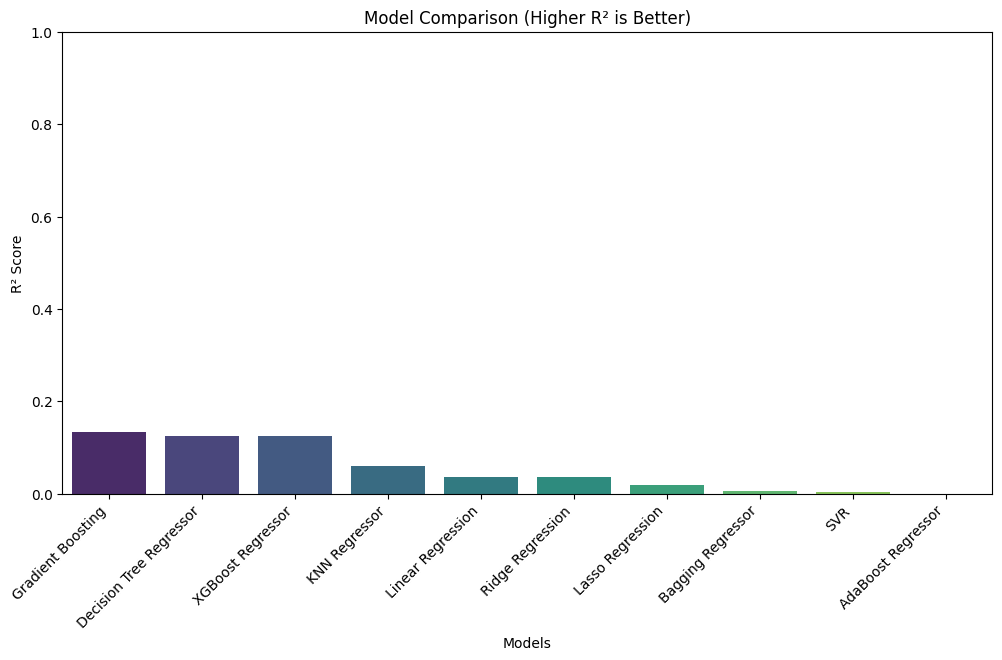

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting R² Score for each model
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Comparison (Higher R² is Better)")
plt.ylim(0, 1)  # Since R² score is between 0 and 1
plt.show()

# MODEL CAMPARISON REPORT

## 1️⃣ Gradient Boosting Regressor
* R² Score: 0.1336
* MAE: 0.4209
* MSE: 1.1906
* RMSE: 1.0911
#### Observations: This model performed the best among all, effectively capturing complex patterns. It is suitable for this dataset but still has room for improvement with hyperparameter tuning.

## 2️⃣ Decision Tree Regressor
* R² Score: 0.1251
* MAE: 0.4395
* MSE: 1.2023
* RMSE: 1.0965
#### Observations: Performs well but tends to overfit the data. Pruning or limiting depth might improve results.

## 3️⃣ XGBoost Regressor
* R² Score: 0.1241
* MAE: 0.4235
* MSE: 1.2036
* RMSE: 1.0971
#### Observations: Similar performance to the Decision Tree, but has better generalization capability. Needs hyperparameter tuning for better optimization.

## 4️⃣ K-Nearest Neighbors (KNN) Regressor
* R² Score: 0.0589
* MAE: 0.4745
* MSE: 1.2931
* RMSE: 1.1371
#### Observations: Struggles with high-dimensional data. The performance is weak, indicating it is not the best choice for this dataset.

## 5️⃣ Linear Regression
* R² Score: 0.0365
* MAE: 0.4805
* MSE: 1.3240
* RMSE: 1.1506
#### Observations: Assumes a linear relationship, which does not fit well with the data. This results in a poor prediction capability.

## 6️⃣ Ridge Regression
* R² Score: 0.0364
* MAE: 0.4804
* MSE: 1.3240
* RMSE: 1.1506
#### Observations: Almost identical to Linear Regression, but prevents overfitting slightly better. The improvement is minimal.

## 7️⃣ Lasso Regression
* R² Score: 0.0182
* MAE: 0.4668
* MSE: 1.3491
* RMSE: 1.1615
#### Observations: Feature selection through Lasso led to lower performance, suggesting that all features are important for prediction.

## 8️⃣ Bagging Regressor
* R² Score: 0.0062
* MAE: 0.4702
* MSE: 1.3656
* RMSE: 1.1686
#### Observations: While reducing variance, it does not contribute significantly to improving model performance.

## 9️⃣ Support Vector Regressor (SVR)
* R² Score: 0.0042
* MAE: 0.3781
* MSE: 1.3683
* RMSE: 1.1697
#### Observations: Did not perform well, possibly due to poor kernel selection and lack of non-linearity in the data.

## 🔟 AdaBoost Regressor
* R² Score: -0.0985
* MAE: 0.7569
* MSE: 1.5096
* RMSE: 1.2286
#### Observations: The worst-performing model. It fails to capture patterns in data, leading to significant underfitting.


# CHALLENGES FACED REPORT

## 1️⃣ Data Quality Issues
* Missing values were present in key columns like originalPrice, requiring imputation.
* Some columns were in string format and needed conversion to numeric.
* tagText was initially categorical but converted to numeric for better modeling.

## 2️⃣ Feature Engineering
* Created furniture_category, which slightly improved model accuracy.
* Applied Label Encoding to categorical variables for compatibility with models.

## 3️⃣ Model Performance Variations
* Gradient Boosting performed the best but still had a low R² score, meaning the dataset lacks strong predictive power.
* Linear Regression performed poorly due to the presence of non-linearity in data.
* Tree-based models (Decision Tree, XGBoost) showed promise but needed better hyperparameter tuning.
* AdaBoost completely failed, indicating it couldn't capture any meaningful pattern from the dataset.

## 4️⃣ Next Steps & Improvements
* Hyperparameter tuning can improve Gradient Boosting even further.
* Feature engineering should be enhanced to create new predictive variables.
* More data collection or adding external features could help improve prediction accuracy.
